In [25]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import seaborn as sns

In [26]:
img = cv2.imread('./Test_Images/Kohli (104).jpg')

img.shape

# The 3rd Dimension contains RGB Values of the Image

(464, 812, 3)

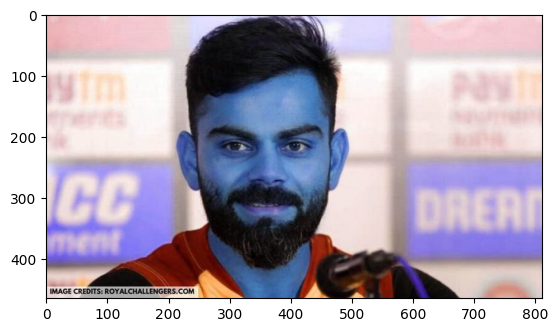

In [27]:
plt.imshow(img)

In [28]:
grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

grey_img.shape

# Since the Image is converted into a Gray Scale image the 3rd dimesion is removed

(464, 812)

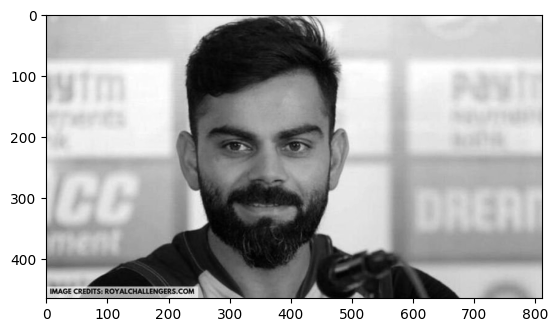

In [29]:
plt.imshow(grey_img,cmap = 'gray')

In [30]:
grey_img

array([[183, 183, 184, ..., 228, 228, 228],
       [183, 183, 184, ..., 230, 230, 230],
       [183, 183, 184, ..., 230, 230, 230],
       ...,
       [220, 217, 211, ..., 208, 208, 209],
       [216, 216, 217, ..., 208, 208, 209],
       [218, 214, 216, ..., 207, 208, 209]], dtype=uint8)

In [31]:
face_cascade = cv2.CascadeClassifier('./opencv_xml/haarcascade_frontalface_default.xml')

face = face_cascade.detectMultiScale(grey_img , 1.3  ,4)

face

#The Output contains the x , y , width and height coordinates of the face detected in the image

array([[216, 102, 284, 284]])

In [32]:
x , y , w , h = face[0]

x , y , w , h 

(216, 102, 284, 284)

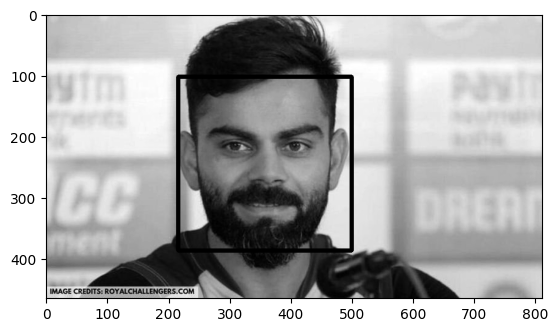

In [33]:
cropped_face = cv2.rectangle(grey_img , (x , y) , (x+w , y+h) , (0,255, 0), 5)

plt.imshow(cropped_face , cmap= 'gray')

In [34]:
eye_cascade = cv2.CascadeClassifier('./opencv_xml/haarcascade_eye.xml')

eyes = eye_cascade.detectMultiScale(grey_img , 1.3 , 5)

eyes

array([[379, 189,  54,  54],
       [280, 184,  62,  62]])

In [35]:
x1 , y1 , w1, h1 = eyes[0]

x2 , y2 , w2 , h2  = eyes[1]

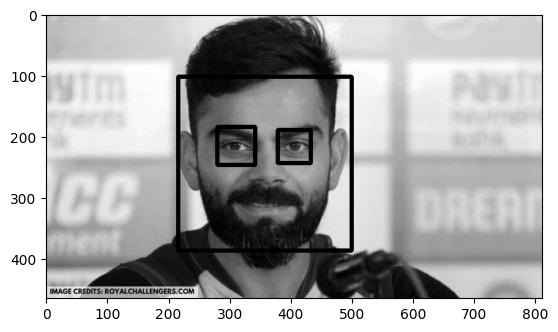

In [36]:
cropped_eyes1 = cv2.rectangle(cropped_face , (x1 , y1) , (x1+w1 , y1+h1) , (0,255, 0), 5)

cropped_eyes2 = cv2.rectangle(cropped_face , (x2 , y2) , (x2+w2 , y2+h2) , (0,0,255), 5)

plt.imshow(cropped_face , cmap = 'gray')

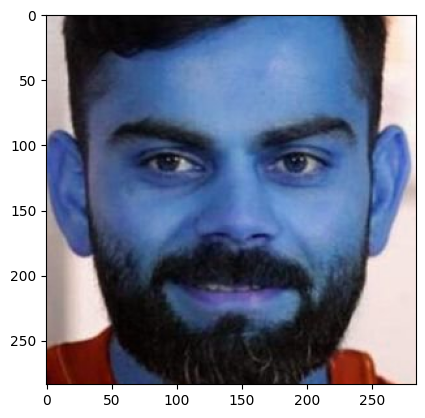

In [37]:
roi_colored = img[y:y + h, x:x + w]

plt.imshow(roi_colored)

In [38]:
import os
def face_and_eyes(img_path):
    
    if not os.path.isfile(img_path):
        
        print(f"File not found: {img_path}")
        
        return None
    
    img = cv2.imread(img_path)
    if img is None:
        
        print(f"Failed to load image: {img_path}")
        
        return None
    
    grey_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    face_cascade = cv2.CascadeClassifier('./opencv_xml/haarcascade_frontalface_default.xml')
    
    face = face_cascade.detectMultiScale(grey_img , 1.3 , 5)
    
    eye_cascade = cv2.CascadeClassifier('./opencv_xml/haarcascade_eye.xml')

    if len(face) == 0:
        
        return None

    for (x, y, w, h) in face:
        
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 5)
        
        roi_grey = grey_img[y:y + h, x:x + w]
        
        roi_color = img[y:y + h, x:x + w]
        
    
        eyes = eye_cascade.detectMultiScale(roi_grey , 1.3 , 5)
        eyes = eye_cascade.detectMultiScale(roi_color , 1.3 , 5)


        if len(eyes) == 0: 
                        
            return None

        # for (ex, ey, ew, eh) in eyes:
            
        #     cv2.rectangle(roi_grey, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)
        #     cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 0, 255), 2)

        
        return roi_color
        
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()
 
    # x , y , w, h = face[0]

    # img_with_face = cv2.rectangle(grey_img , (x , y) , (x+w , y+h) , (0,255, 0), 5)

    # roi_grey = grey_img[y:y+h ,x:x+w]

    # roi_color = img[y:y+h , x:x+w]         # ROI ... Region of Intrest (Face and Eyes)
    
    


In [65]:
path_to_cropped_data = './Datasets/Cropped_Data/'

path_to_data = './Datasets'

In [67]:
import os

path_to_data = './Datasets'
img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir() and entry.name != 'Cropped_Data':
        img_dirs.append(entry.path)

print(img_dirs)


['./Datasets\\Lionel_Messi', './Datasets\\Virat_Kohli']


In [68]:
import shutil

if os.path.exists(path_to_cropped_data):
    
    shutil.rmtree(path_to_cropped_data)
    
    
os.mkdir(path_to_cropped_data)

In [69]:
img_dirs

['./Datasets\\Lionel_Messi', './Datasets\\Virat_Kohli']

In [ ]:
import os
import cv2

cropped_imgs_dir = []
celebrity_file_name_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    
    print(celebrity_name)
    
    if celebrity_name not in celebrity_file_name_dict:
        celebrity_file_name_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        # Skip hidden files and directories
        if entry.name.startswith('.'):
            continue
        
        if entry.is_file():  # Ensure we're only processing files
            roi_color = face_and_eyes(entry.path)
            
            if roi_color is not None:
                cropped_folder = os.path.join(path_to_cropped_data, celebrity_name)
                
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_imgs_dir.append(cropped_folder)
                
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                cv2.imwrite(cropped_file_path, roi_color)
                count += 1
                celebrity_file_name_dict[celebrity_name].append(cropped_file_path)


Lionel_Messi


In [71]:
import pywt
import numpy as np

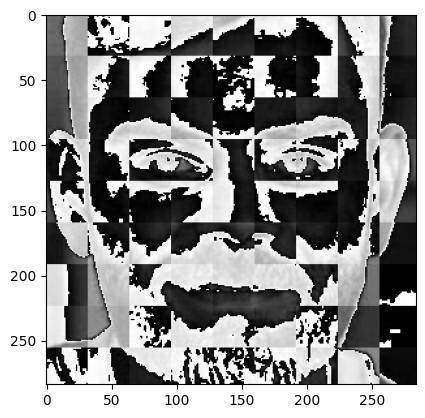

In [45]:
def w2d(img , mode = 'haar' , level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray , cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255
    coeffs = pywt.wavedec2(imArray , mode , level = level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    imArray_H = pywt.waverec2(coeffs_H , mode)
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    return imArray_H

im_har = w2d(roi_colored,'db1' , 5)
plt.imshow(im_har , cmap = 'gray')   # If you need to wavelet transform a grey image , you can skip this step ... imArray = cv2.cvtColor(imArray , cv2.COLOR_RGB2GRAY)

In [46]:
class_dict= {}
count = 0
for celeb_name in celebrity_file_name_dict.keys():
    class_dict[celeb_name] = count
    count+=1

class_dict

{'Cropped_Data': 0, 'Lionel_Messi': 1, 'Virat_Kohli': 2}

In [47]:
X = []
y = []
for celebrity_name , training_files in celebrity_file_name_dict.items():
    for training_image in training_files :
        img = cv2.imread(training_image)
        scaled_raw_img = cv2.resize(img , (32,32))
        img_har = w2d(img , 'db1' , 5)
        scaled_har_img = cv2.resize(img_har , (32,32))
        stacked_image = np.vstack((scaled_raw_img.reshape(32*32*3 ,1) , scaled_har_img.reshape(32*32,1)))
        X.append(stacked_image)
        y.append(celebrity_name)

In [48]:
len(X[0])

4096

In [49]:
X = np.array(X).reshape(len(X) , 4096).astype(float)

X.shape

(102, 4096)

In [50]:
X[0]

array([  0., 255.,   0., ...,  68.,  68.,  68.])

In [51]:
# We use SVM as it performs classification better to train our model...

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [52]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=10))])

In [53]:
pipe.fit(X_train , y_train)

pipe.score(X_test , y_test)

0.9032258064516129

In [54]:
print(classification_report(y_test , pipe.predict(X_test)))

              precision    recall  f1-score   support

Lionel_Messi       0.86      1.00      0.92        18
 Virat_Kohli       1.00      0.77      0.87        13

    accuracy                           0.90        31
   macro avg       0.93      0.88      0.90        31
weighted avg       0.92      0.90      0.90        31



In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto', probability=True),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'logisticregression__C': [1, 5, 10]
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo , model_parameters in model_params.items():
    pipe = make_pipeline(StandardScaler() , model_parameters['model'])
    clf = GridSearchCV(pipe , model_parameters['params'] ,cv=5 , return_train_score = False)
    clf.fit(X_train, y_train)
    scores.append({
        'model' : algo , 
        'best_score': clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_

df= pd.DataFrame(scores , columns = ['model' , 'best_score' , 'best_params'])
df

,model,best_score,best_params
0,svm,0.944762,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.845714,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.930476,{'logisticregression__C': 5}


In [57]:
best_clf = best_estimators['svm']

In [58]:
!pip install joblib

import joblib

In [59]:
joblib.dump(best_clf , 'saved_model.pkl')

['saved_model.pkl']

In [60]:
import json

In [61]:
with open("class_dictionary.json" , 'w') as file:
    file.write(json.dumps(class_dict))